# Explore here

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


Our Traget variable is going to be "total hospitals" which is health-related and can provide us with a wider analysis in relation to the sociodemographic study.


In [2]:
#Save raw data
total_data.to_csv("../data/raw/total_data.csv", index = False)

In [3]:
# Obtain dimensions
total_data.shape

(3140, 108)

In [4]:
# Obtain info about data type and null values.and
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
#Eliminate duplicate info
total_data = total_data.drop_duplicates()
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


There are no duplicates in this data frame

Eliminate Irrelevant info

In [6]:
columns_to_keep = ["N_POP_CHG_2018","POVALL_2018","MEDHHINC_2018","COUNTY_NAME","STATE_NAME",
    "Total Hospitals (2019)", "TOT_POP","Active General Surgeons per 100000 Population 2018 (AAMC)", 
    "ICU Beds_x", "COPD_number", "Obesity_number",
    "Heart disease_number", "diabetes_number", "CKD_number","anycondition_number"
]

total_data = total_data.drop(columns=[col for col in total_data.columns if col not in columns_to_keep])
total_data.head()

,TOT_POP,N_POP_CHG_2018,POVALL_2018,MEDHHINC_2018,Active General Surgeons per 100000 Population 2018 (AAMC),Total Hospitals (2019),ICU Beds_x,COUNTY_NAME,STATE_NAME,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number
0,55601,158,7587,59338,7.6,1.148905,6,Autauga,Alabama,20181,15193,3345,3644,5462,1326
1,218022,5403,21069,57588,7.6,4.505074,51,Baldwin,Alabama,68790,50761,13414,14692,20520,5479
2,24881,-277,6788,34382,7.6,0.514126,5,Barbour,Alabama,11325,8013,2159,2373,3870,887
3,22400,-155,4400,46064,7.6,0.462860,0,Bibb,Alabama,9190,6894,1533,1789,2511,595
4,57840,13,7527,50412,7.6,1.195171,6,Blount,Alabama,20584,15112,4101,4661,6017,1507


In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 15 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   TOT_POP                                                    3140 non-null   int64  
 1   N_POP_CHG_2018                                             3140 non-null   int64  
 2   POVALL_2018                                                3140 non-null   int64  
 3   MEDHHINC_2018                                              3140 non-null   int64  
 4   Active General Surgeons per 100000 Population 2018 (AAMC)  3140 non-null   float64
 5   Total Hospitals (2019)                                     3140 non-null   float64
 6   ICU Beds_x                                                 3140 non-null   int64  
 7   COUNTY_NAME                                                3140 non-null   object 
 8   STATE_NA

Now that we eliminated the most irrelevant information, we can see that we have 2 categoric values and and 13 numeric values. There are no non-null values.

In [8]:
total_data.select_dtypes(include=['object']).columns.tolist()

['COUNTY_NAME', 'STATE_NAME']

Categoric Variables Analysis

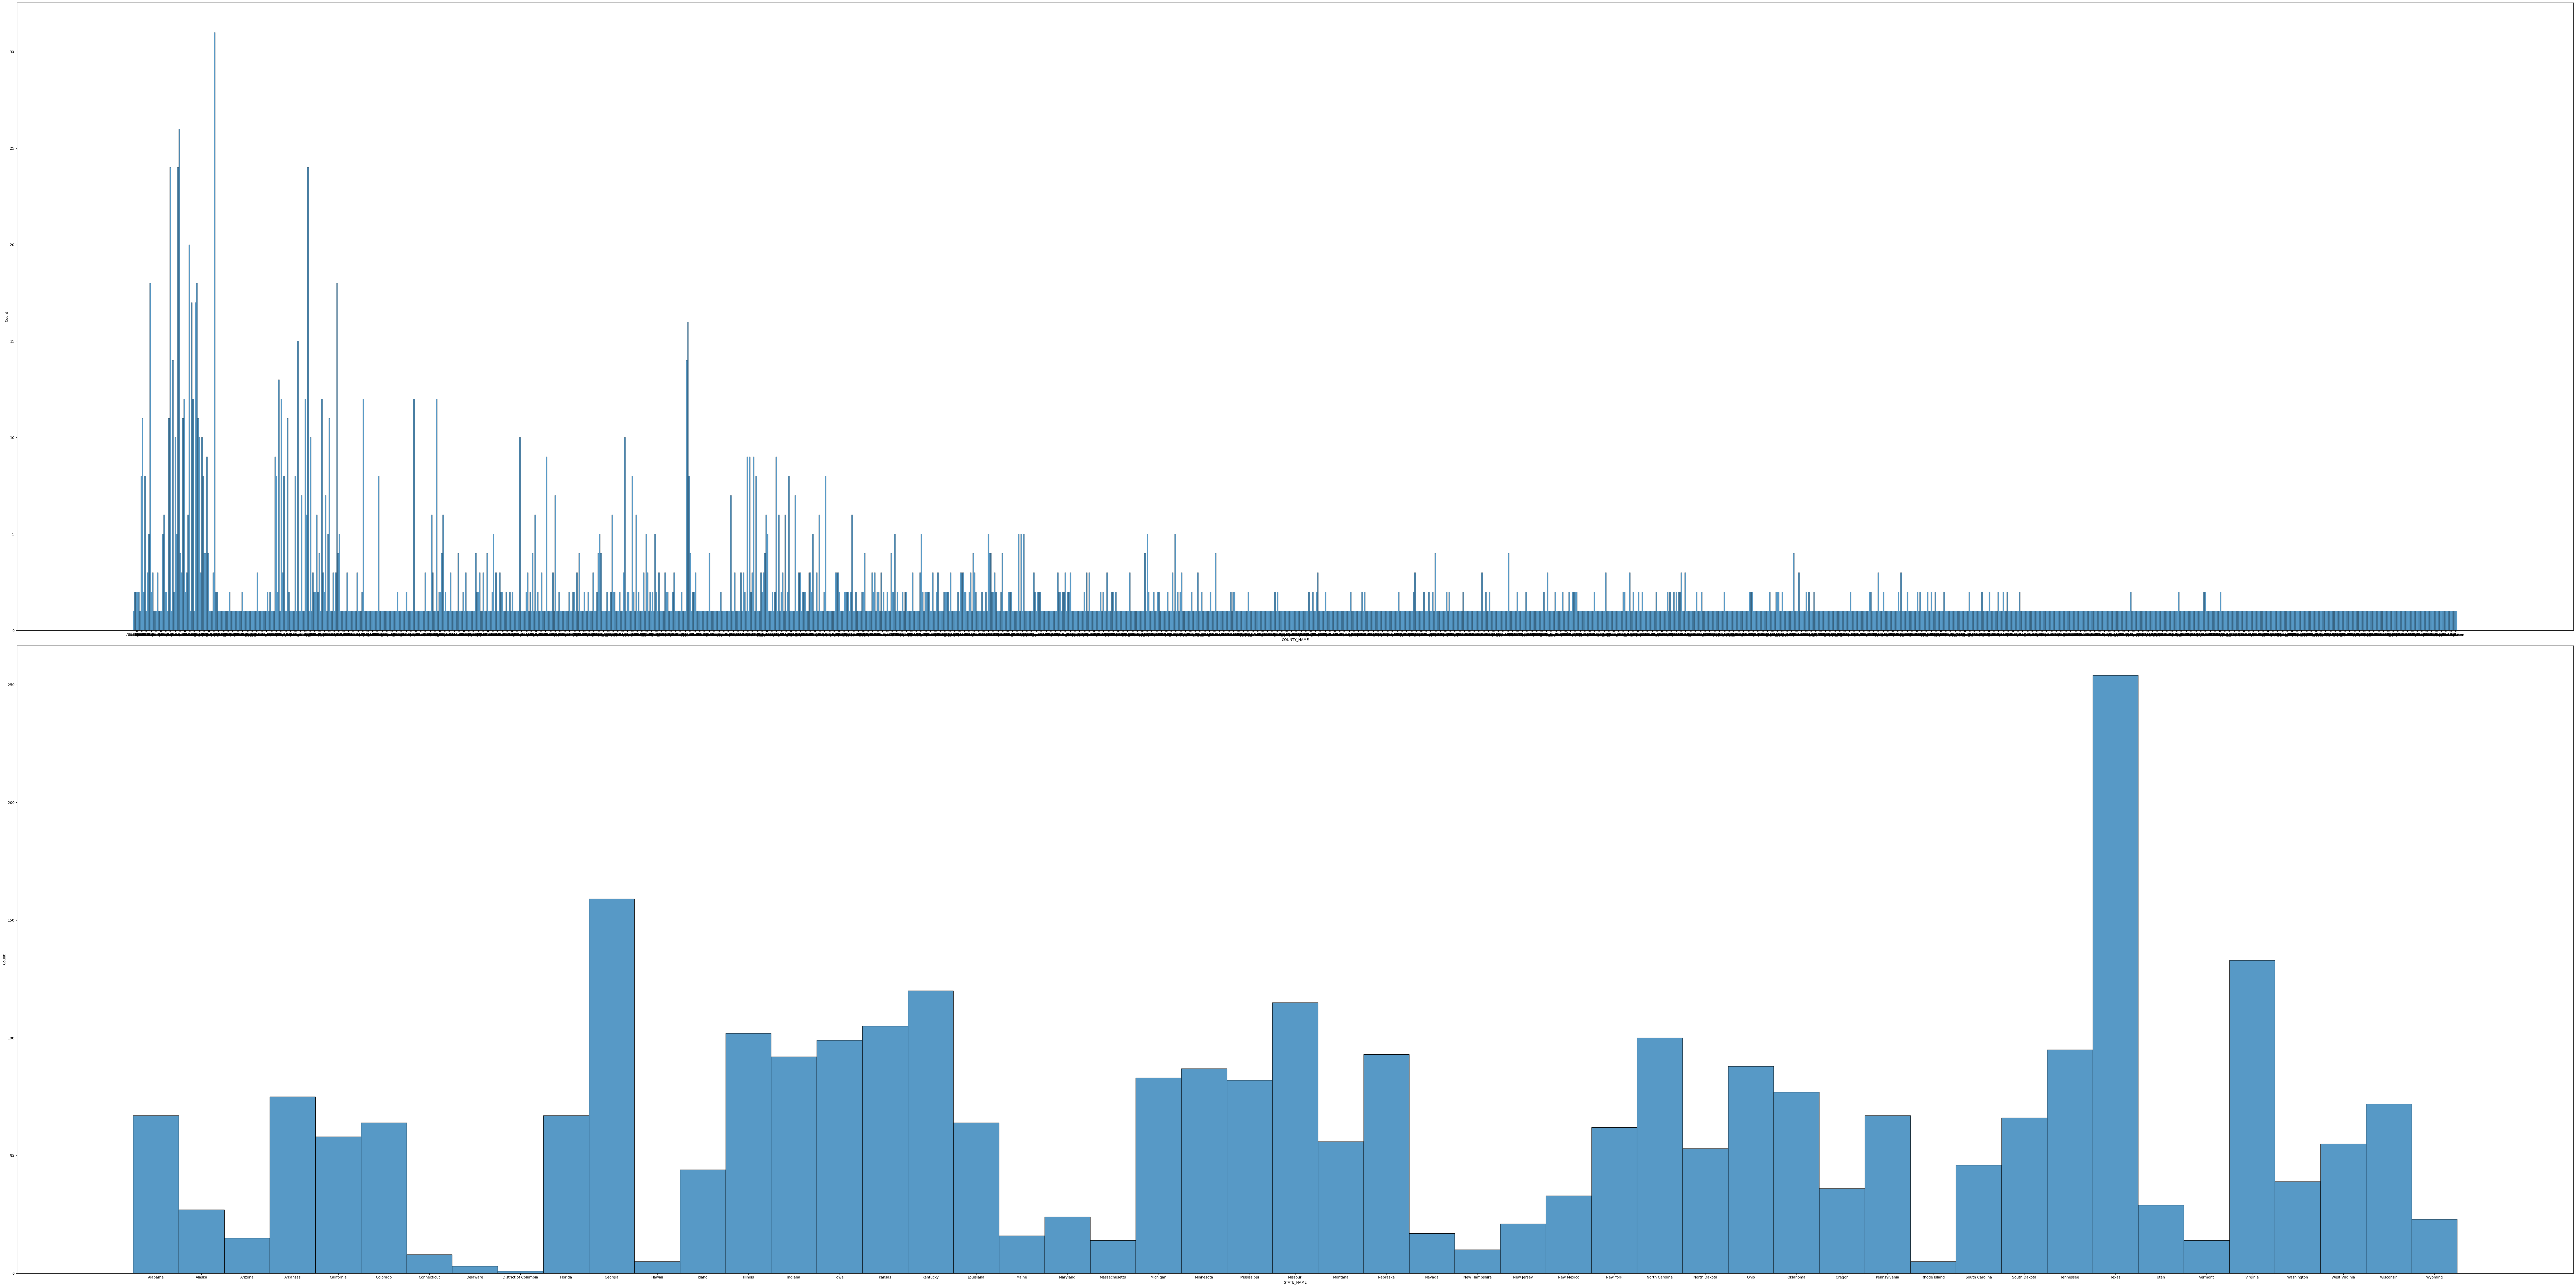

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (100, 50))
sns.histplot(ax = axis[0], data = total_data, x = "COUNTY_NAME")
sns.histplot(ax = axis[1], data = total_data, x = "STATE_NAME")

plt.tight_layout()
plt.show()

Numeric Variables Analysis

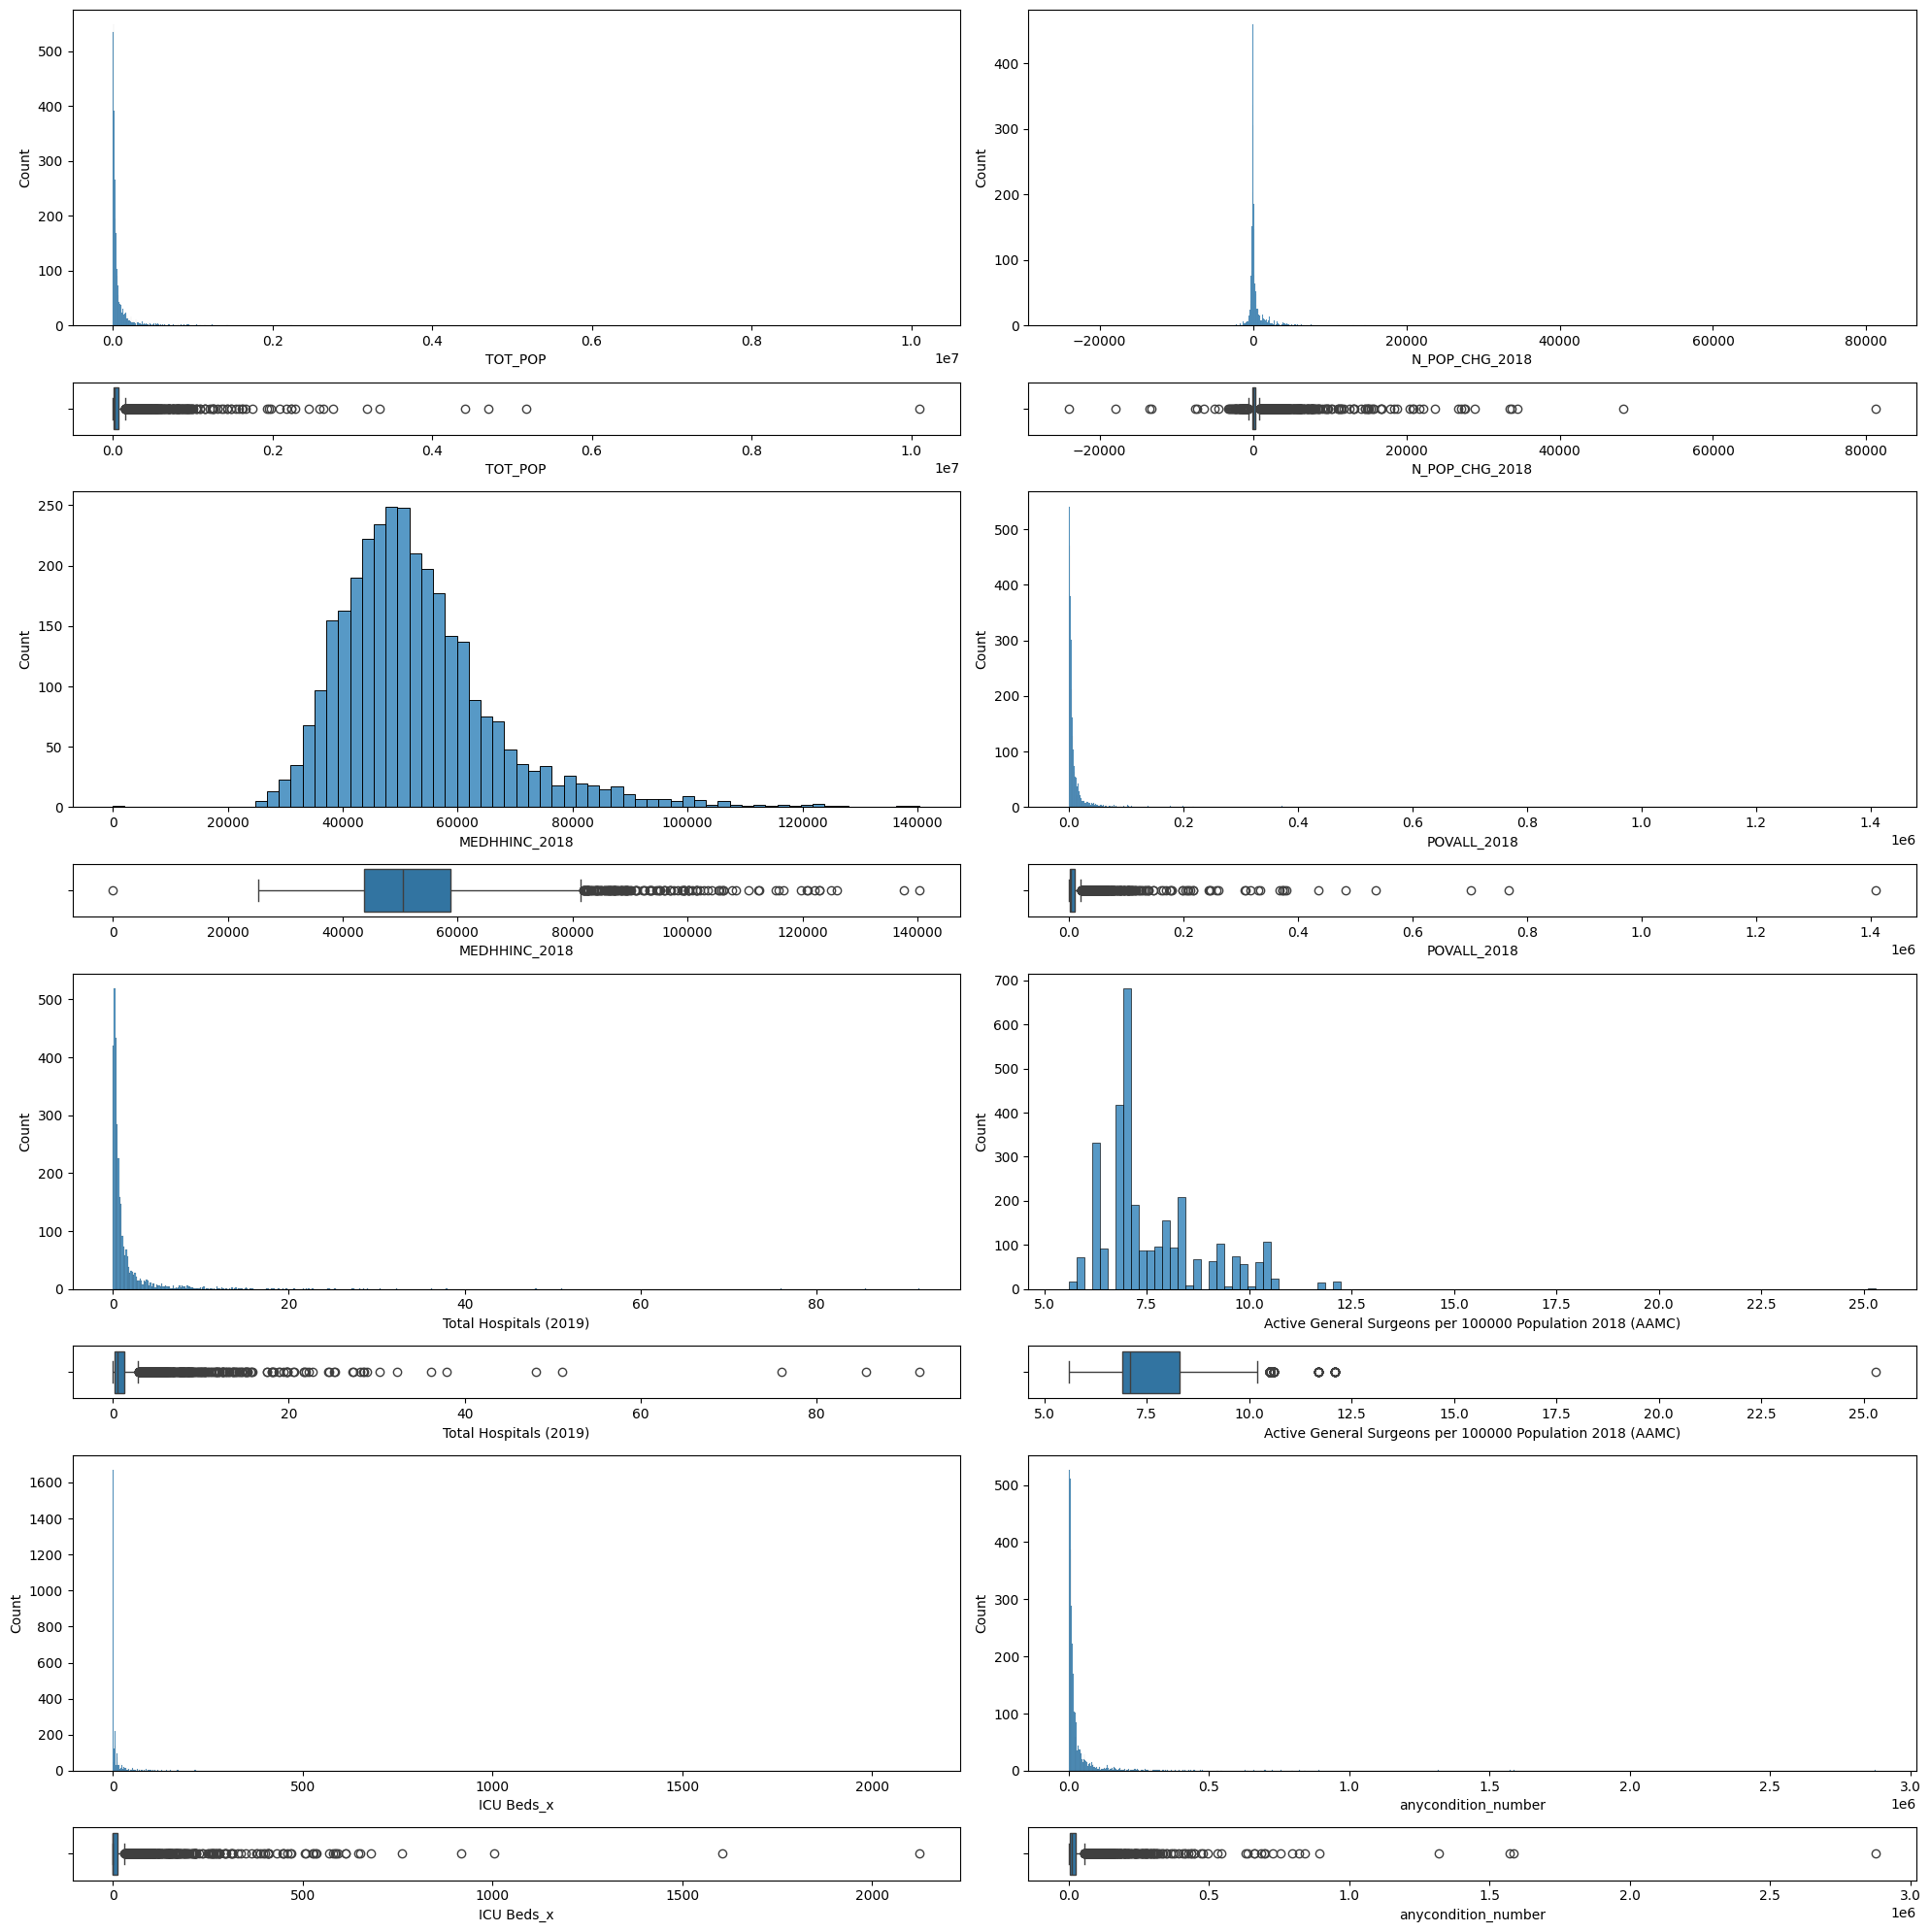

In [10]:
fig, axis = plt.subplots(8, 2, figsize = (20, 20), gridspec_kw = {"height_ratios": [6, 1]*4})

sns.histplot(ax = axis[0, 0], data = total_data, x = "TOT_POP")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "TOT_POP")

sns.histplot(ax = axis[0,1], data = total_data, x = "N_POP_CHG_2018")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "N_POP_CHG_2018")

sns.histplot(ax = axis[2,0], data = total_data, x = "MEDHHINC_2018")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "MEDHHINC_2018")

sns.histplot(ax = axis[2,1], data = total_data, x = "POVALL_2018")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "POVALL_2018")

sns.histplot(ax = axis[4,0], data = total_data, x = "Total Hospitals (2019)")
sns.boxplot(ax = axis[5, 0], data = total_data, x = "Total Hospitals (2019)")

sns.histplot(ax = axis[4,1], data = total_data, x = "Active General Surgeons per 100000 Population 2018 (AAMC)")
sns.boxplot(ax = axis[5, 1], data = total_data, x = "Active General Surgeons per 100000 Population 2018 (AAMC)")

sns.histplot(ax = axis[6, 0], data = total_data, x = "ICU Beds_x")
sns.boxplot(ax = axis[7, 0], data = total_data, x = "ICU Beds_x")

sns.histplot(ax = axis[6, 1], data = total_data, x = "anycondition_number")
sns.boxplot(ax = axis[7, 1], data = total_data, x = "anycondition_number")

plt.tight_layout()
plt.show()

Numerical-Numerical Analysis

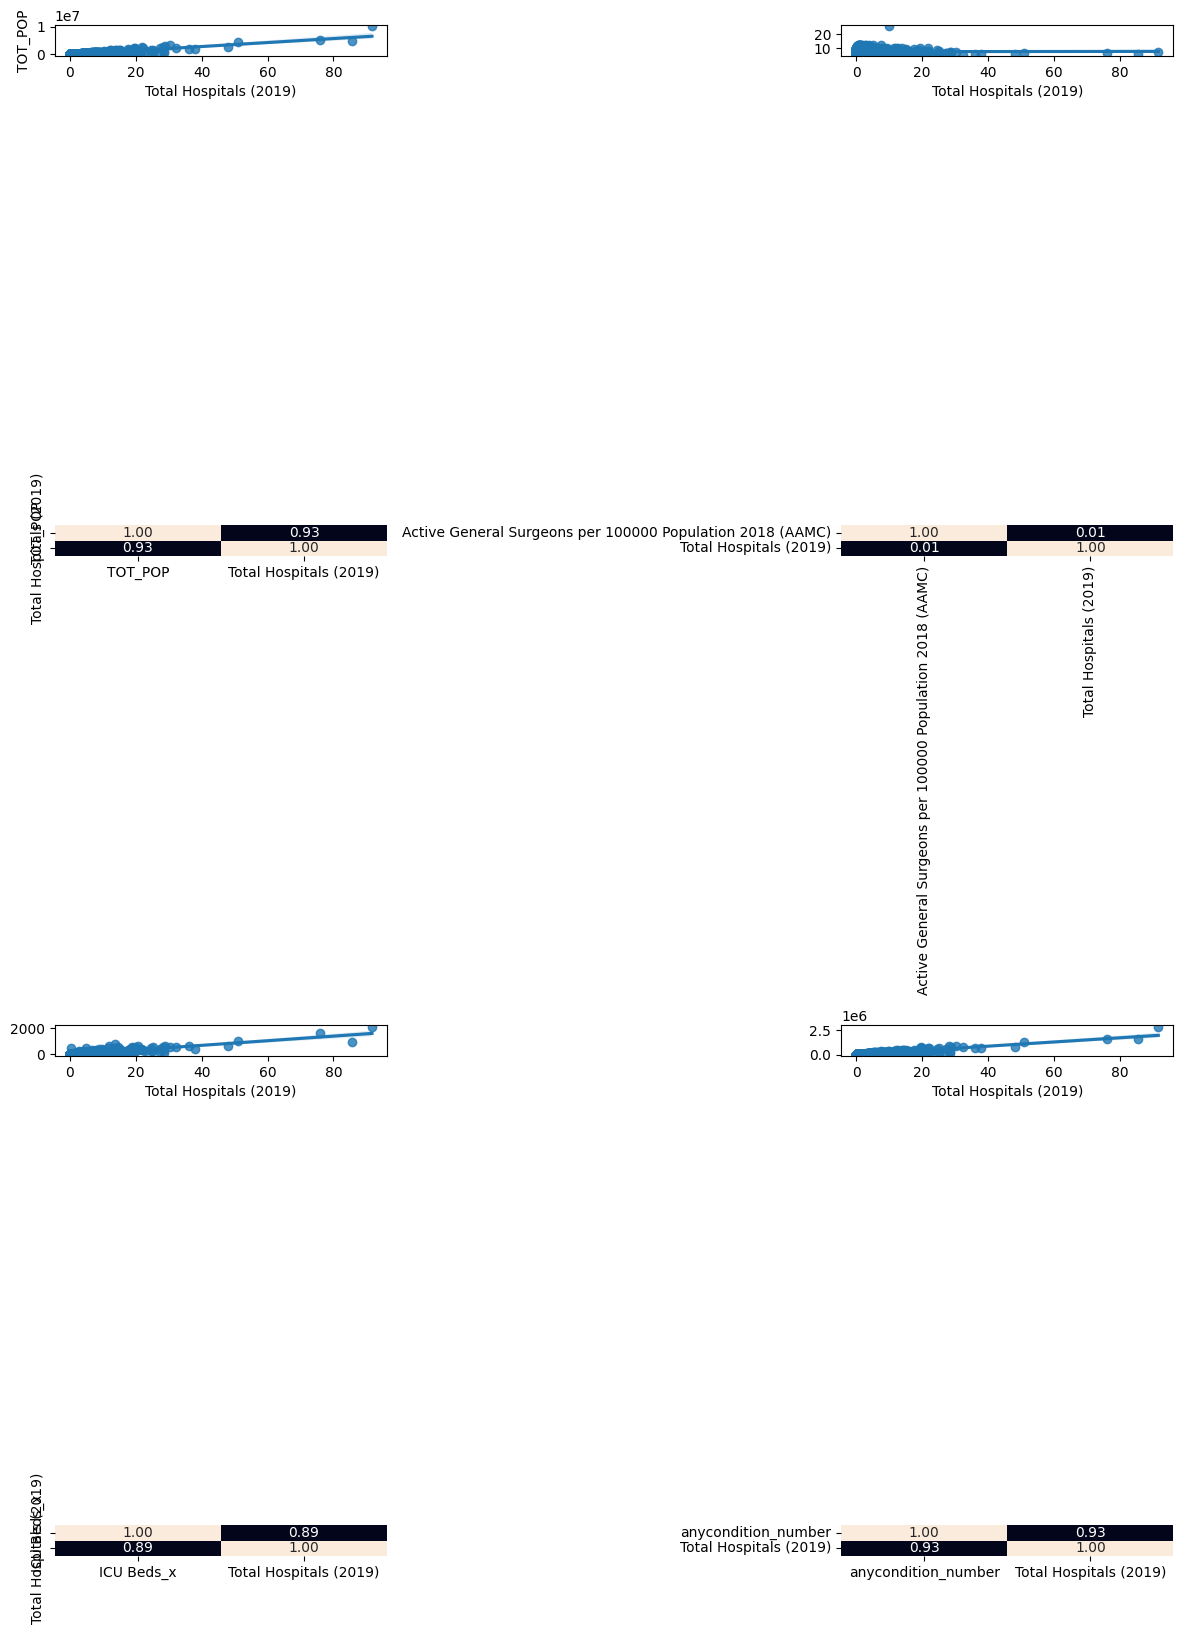

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize=(12, 16))

# Regplot and heatmap for Total Hospitals vs. TOT_POP
sns.regplot(ax=axis[0, 0], data=total_data, x="Total Hospitals (2019)", y="TOT_POP")
sns.heatmap(total_data[["TOT_POP", "Total Hospitals (2019)"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Regplot and heatmap for Total Hospitals vs. Active Surgeons
sns.regplot(ax=axis[0, 1], data=total_data, x="Total Hospitals (2019)", y="Active General Surgeons per 100000 Population 2018 (AAMC)").set(ylabel=None)
sns.heatmap(total_data[["Active General Surgeons per 100000 Population 2018 (AAMC)", "Total Hospitals (2019)"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

# Regplot and heatmap for Total Hospitals vs. ICU Beds
sns.regplot(ax=axis[2, 0], data=total_data, x="Total Hospitals (2019)", y="ICU Beds_x").set(ylabel=None)
sns.heatmap(total_data[["ICU Beds_x", "Total Hospitals (2019)"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

# Regplot and heatmap for Total Hospitals vs. anycondition_number
sns.regplot(ax=axis[2, 1], data=total_data, x="Total Hospitals (2019)", y="anycondition_number").set(ylabel=None)
sns.heatmap(total_data[["anycondition_number", "Total Hospitals (2019)"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

plt.tight_layout()
plt.show()


We can see that there is a strong relation between the total population, the number of ICU Beds_x, and the anycondition number. However there is not such a relevant relation between the number of active surgeons.

Categorical-Categorical Analysis

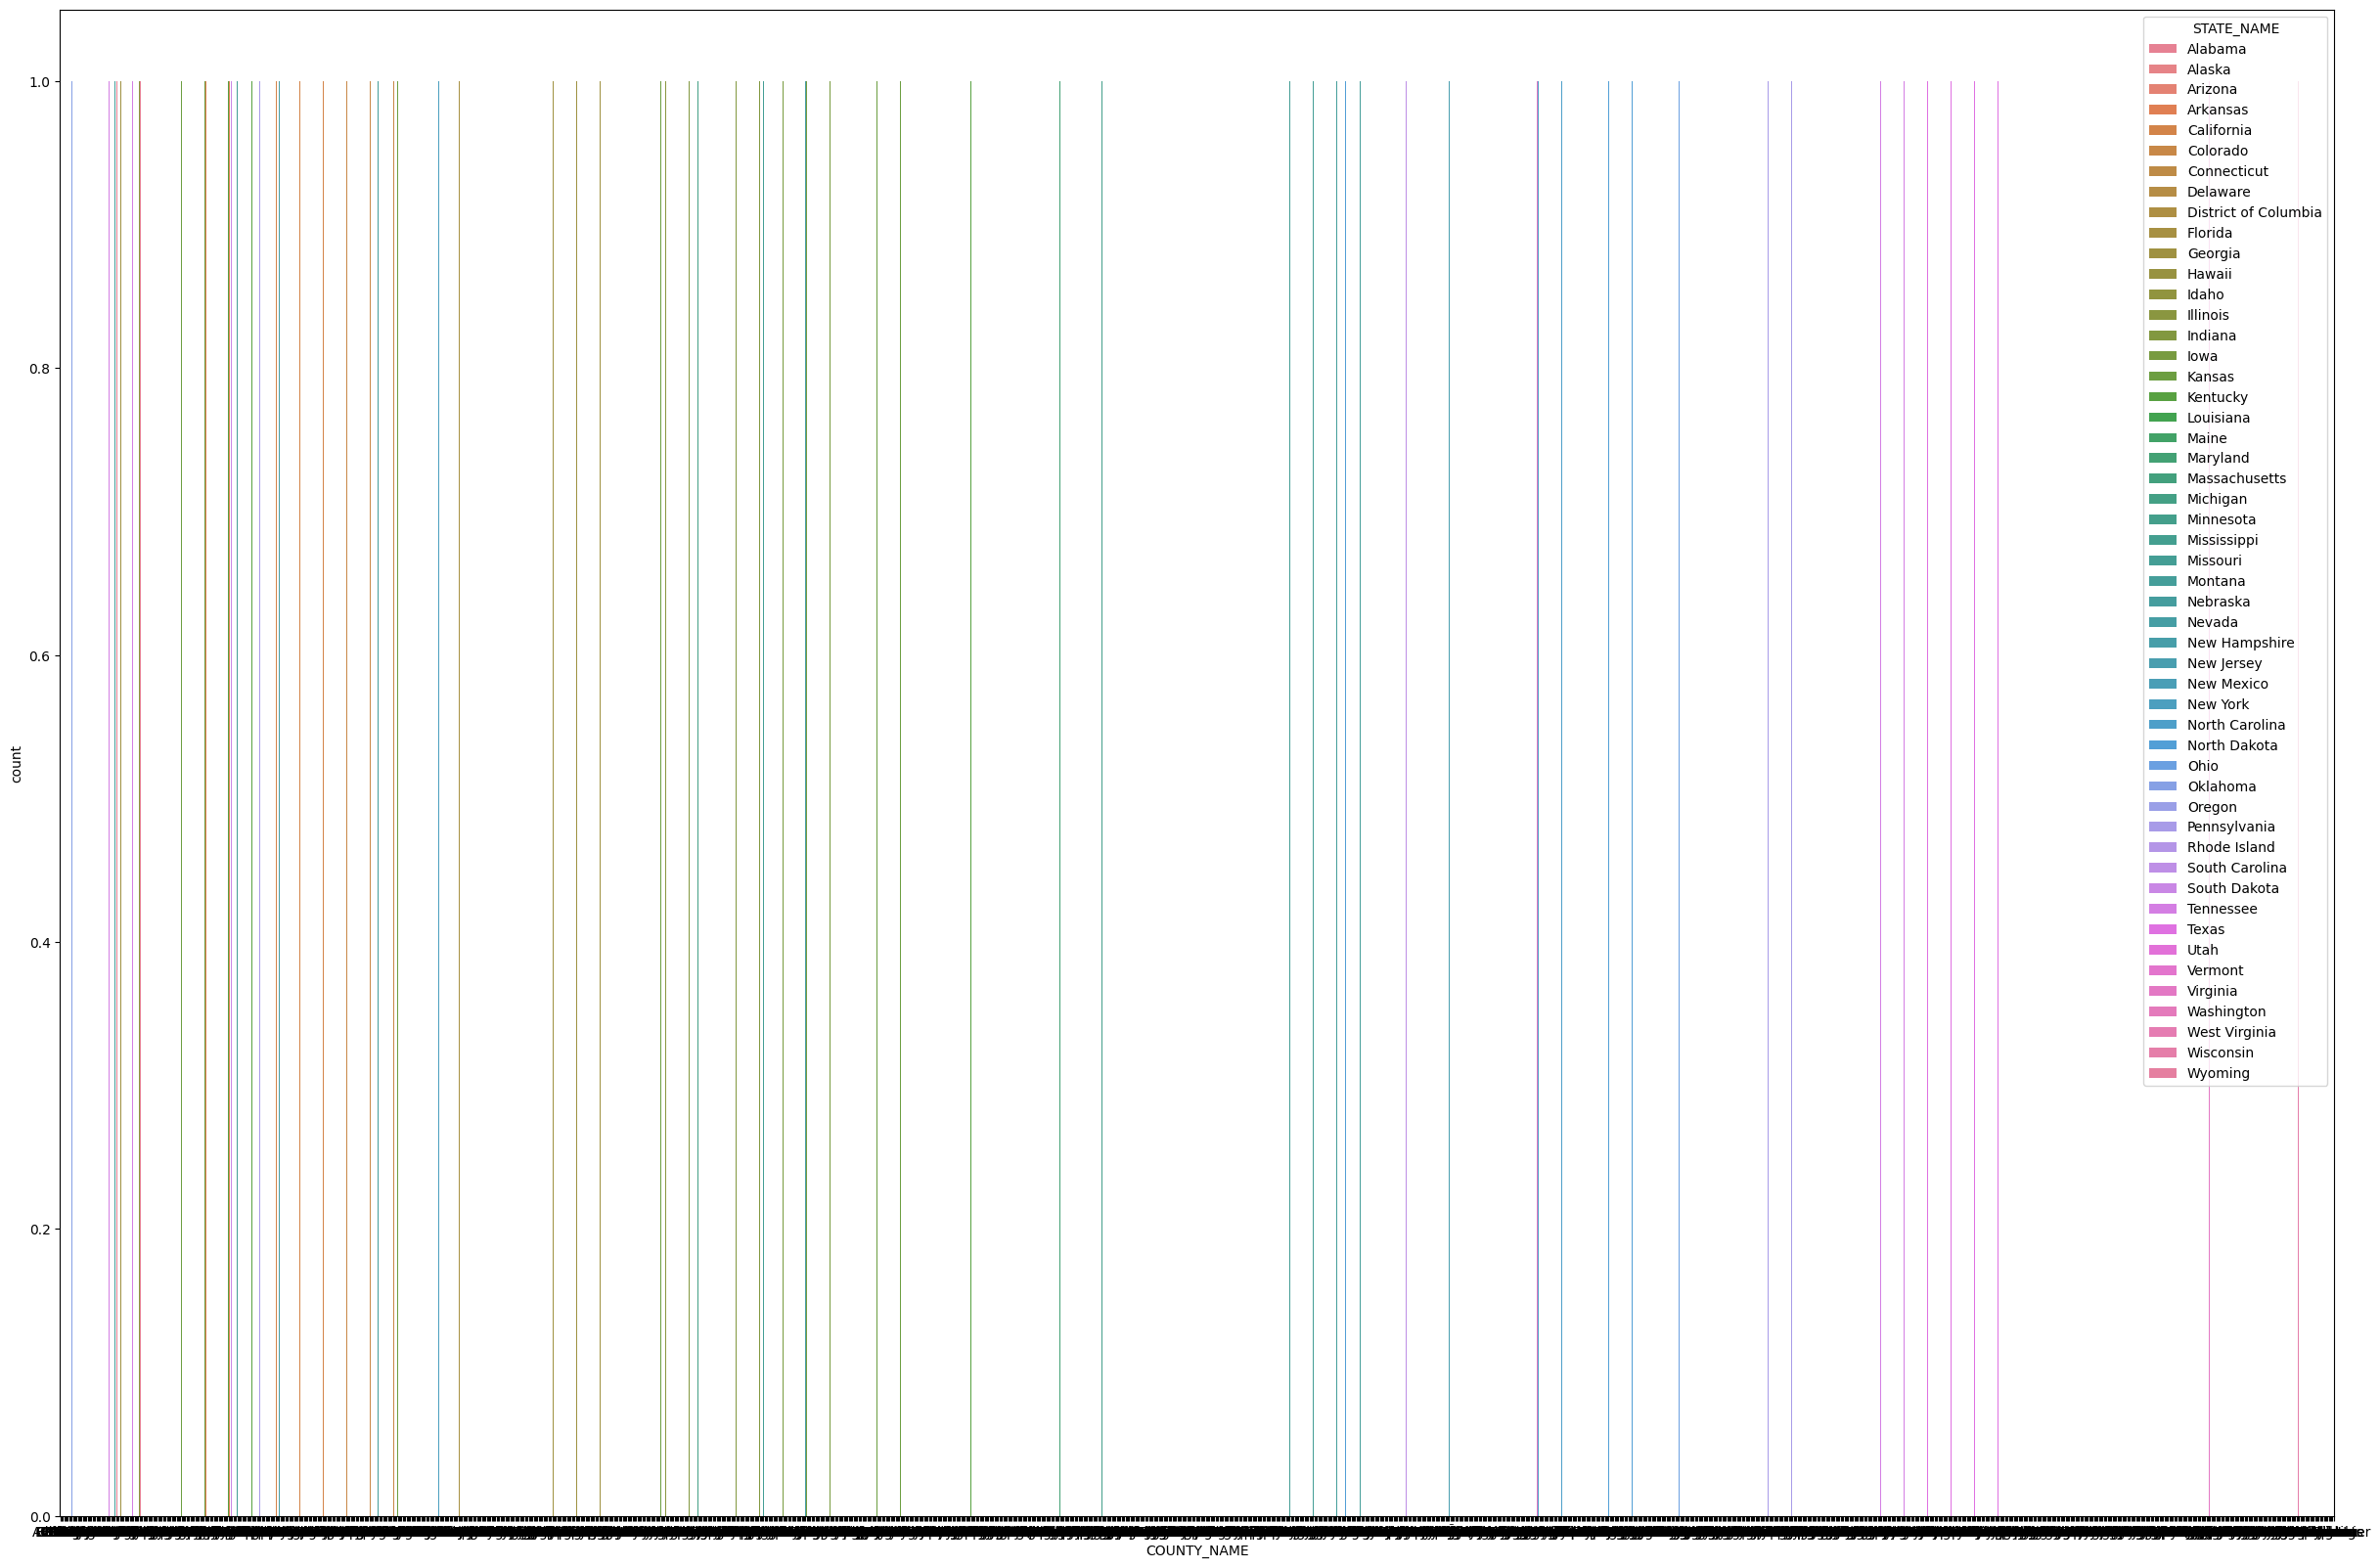

In [12]:
fig, axis = plt.subplots(figsize = (30, 20))

sns.countplot(data = total_data, x = "COUNTY_NAME", hue = "STATE_NAME")
plt.show()

Numerical - Categorical Analysis

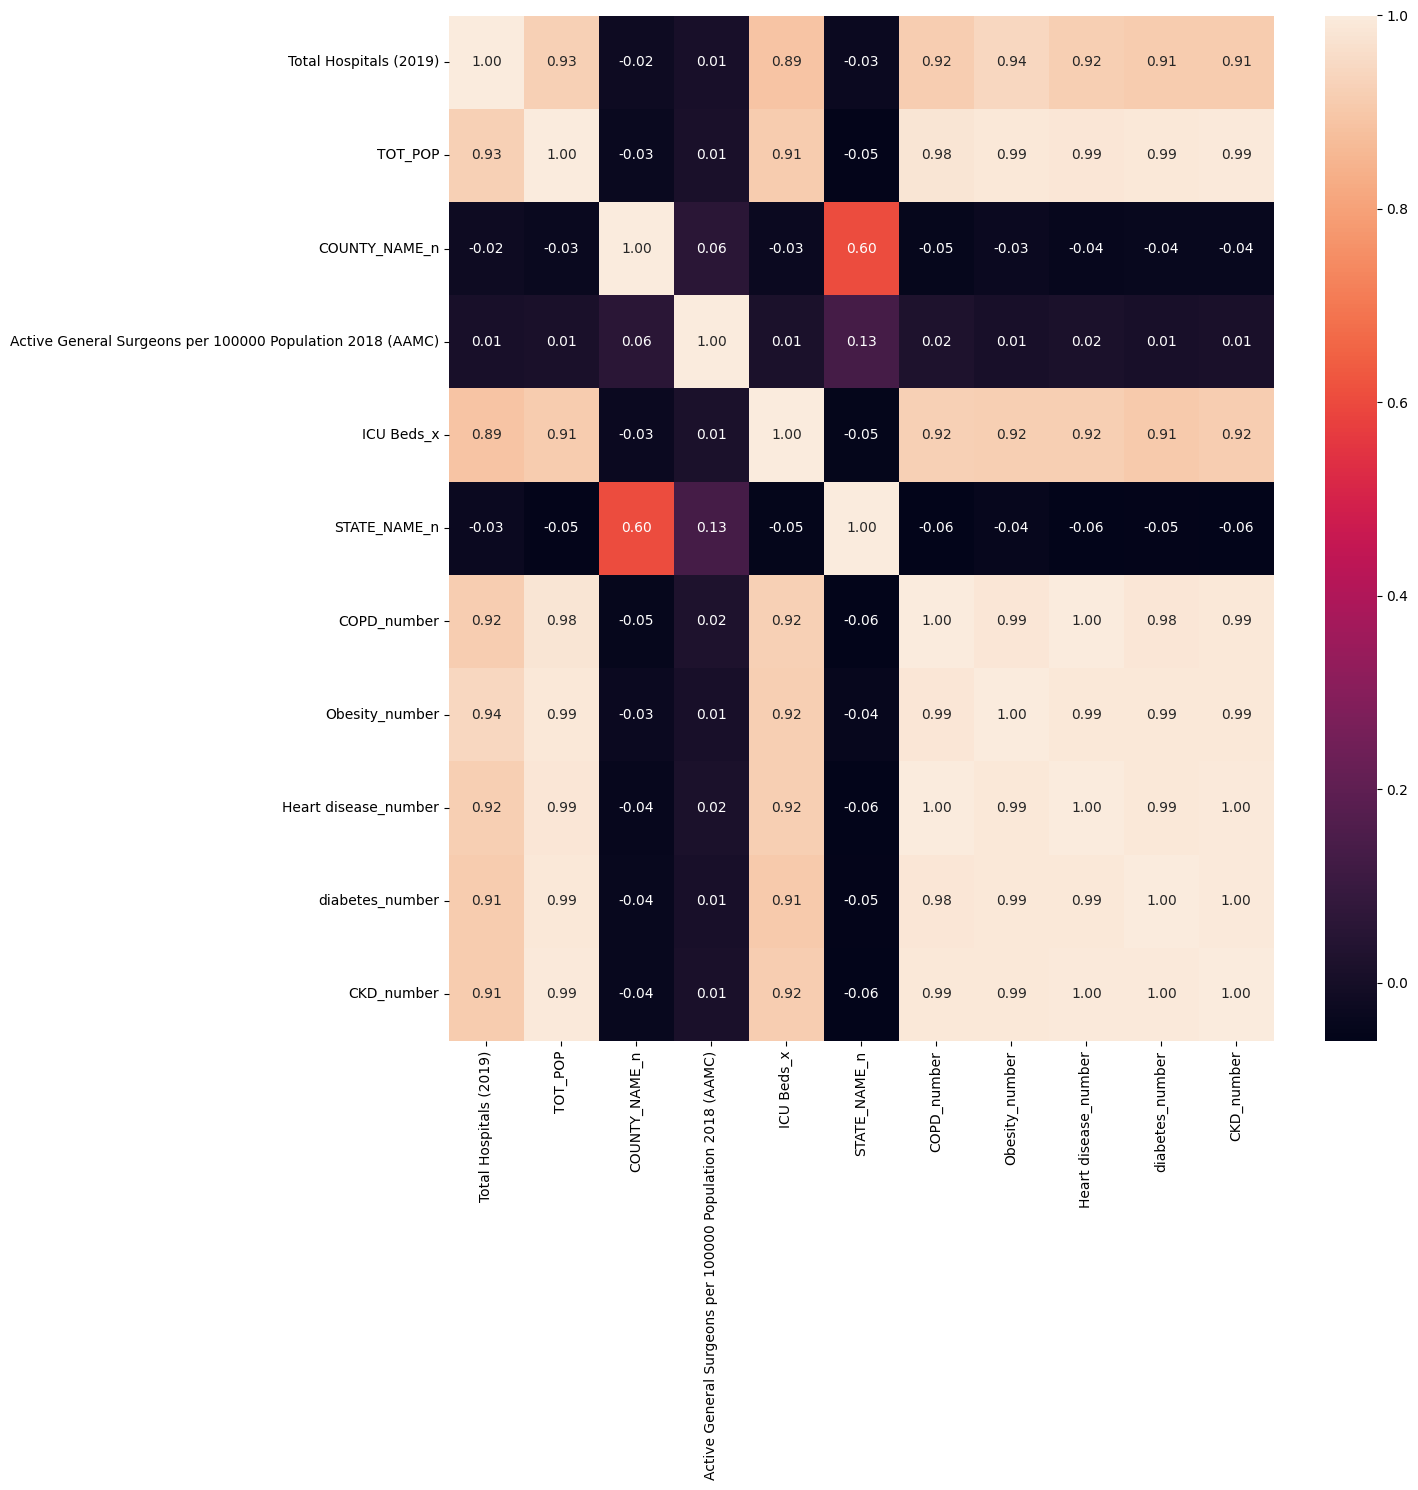

In [13]:
total_data["STATE_NAME_n"] = pd.factorize(total_data["STATE_NAME"])[0]
total_data["COUNTY_NAME_n"] = pd.factorize(total_data["COUNTY_NAME"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["Total Hospitals (2019)","TOT_POP", "COUNTY_NAME_n", "Active General Surgeons per 100000 Population 2018 (AAMC)", "ICU Beds_x", "STATE_NAME_n", "COPD_number", "Obesity_number","Heart disease_number","diabetes_number", "CKD_number"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

We can see that there are several values that have a strong relation, like the total population with # of ICU BEDS, and the diseases like diabetes, COPD, Heart disease, CKD and Obesity.Also we can see that the relation between this diseases is strong as well as the number of hospitals. There is a some relation between the states and the county, which make sanse given the data we have.

All Data Analysis

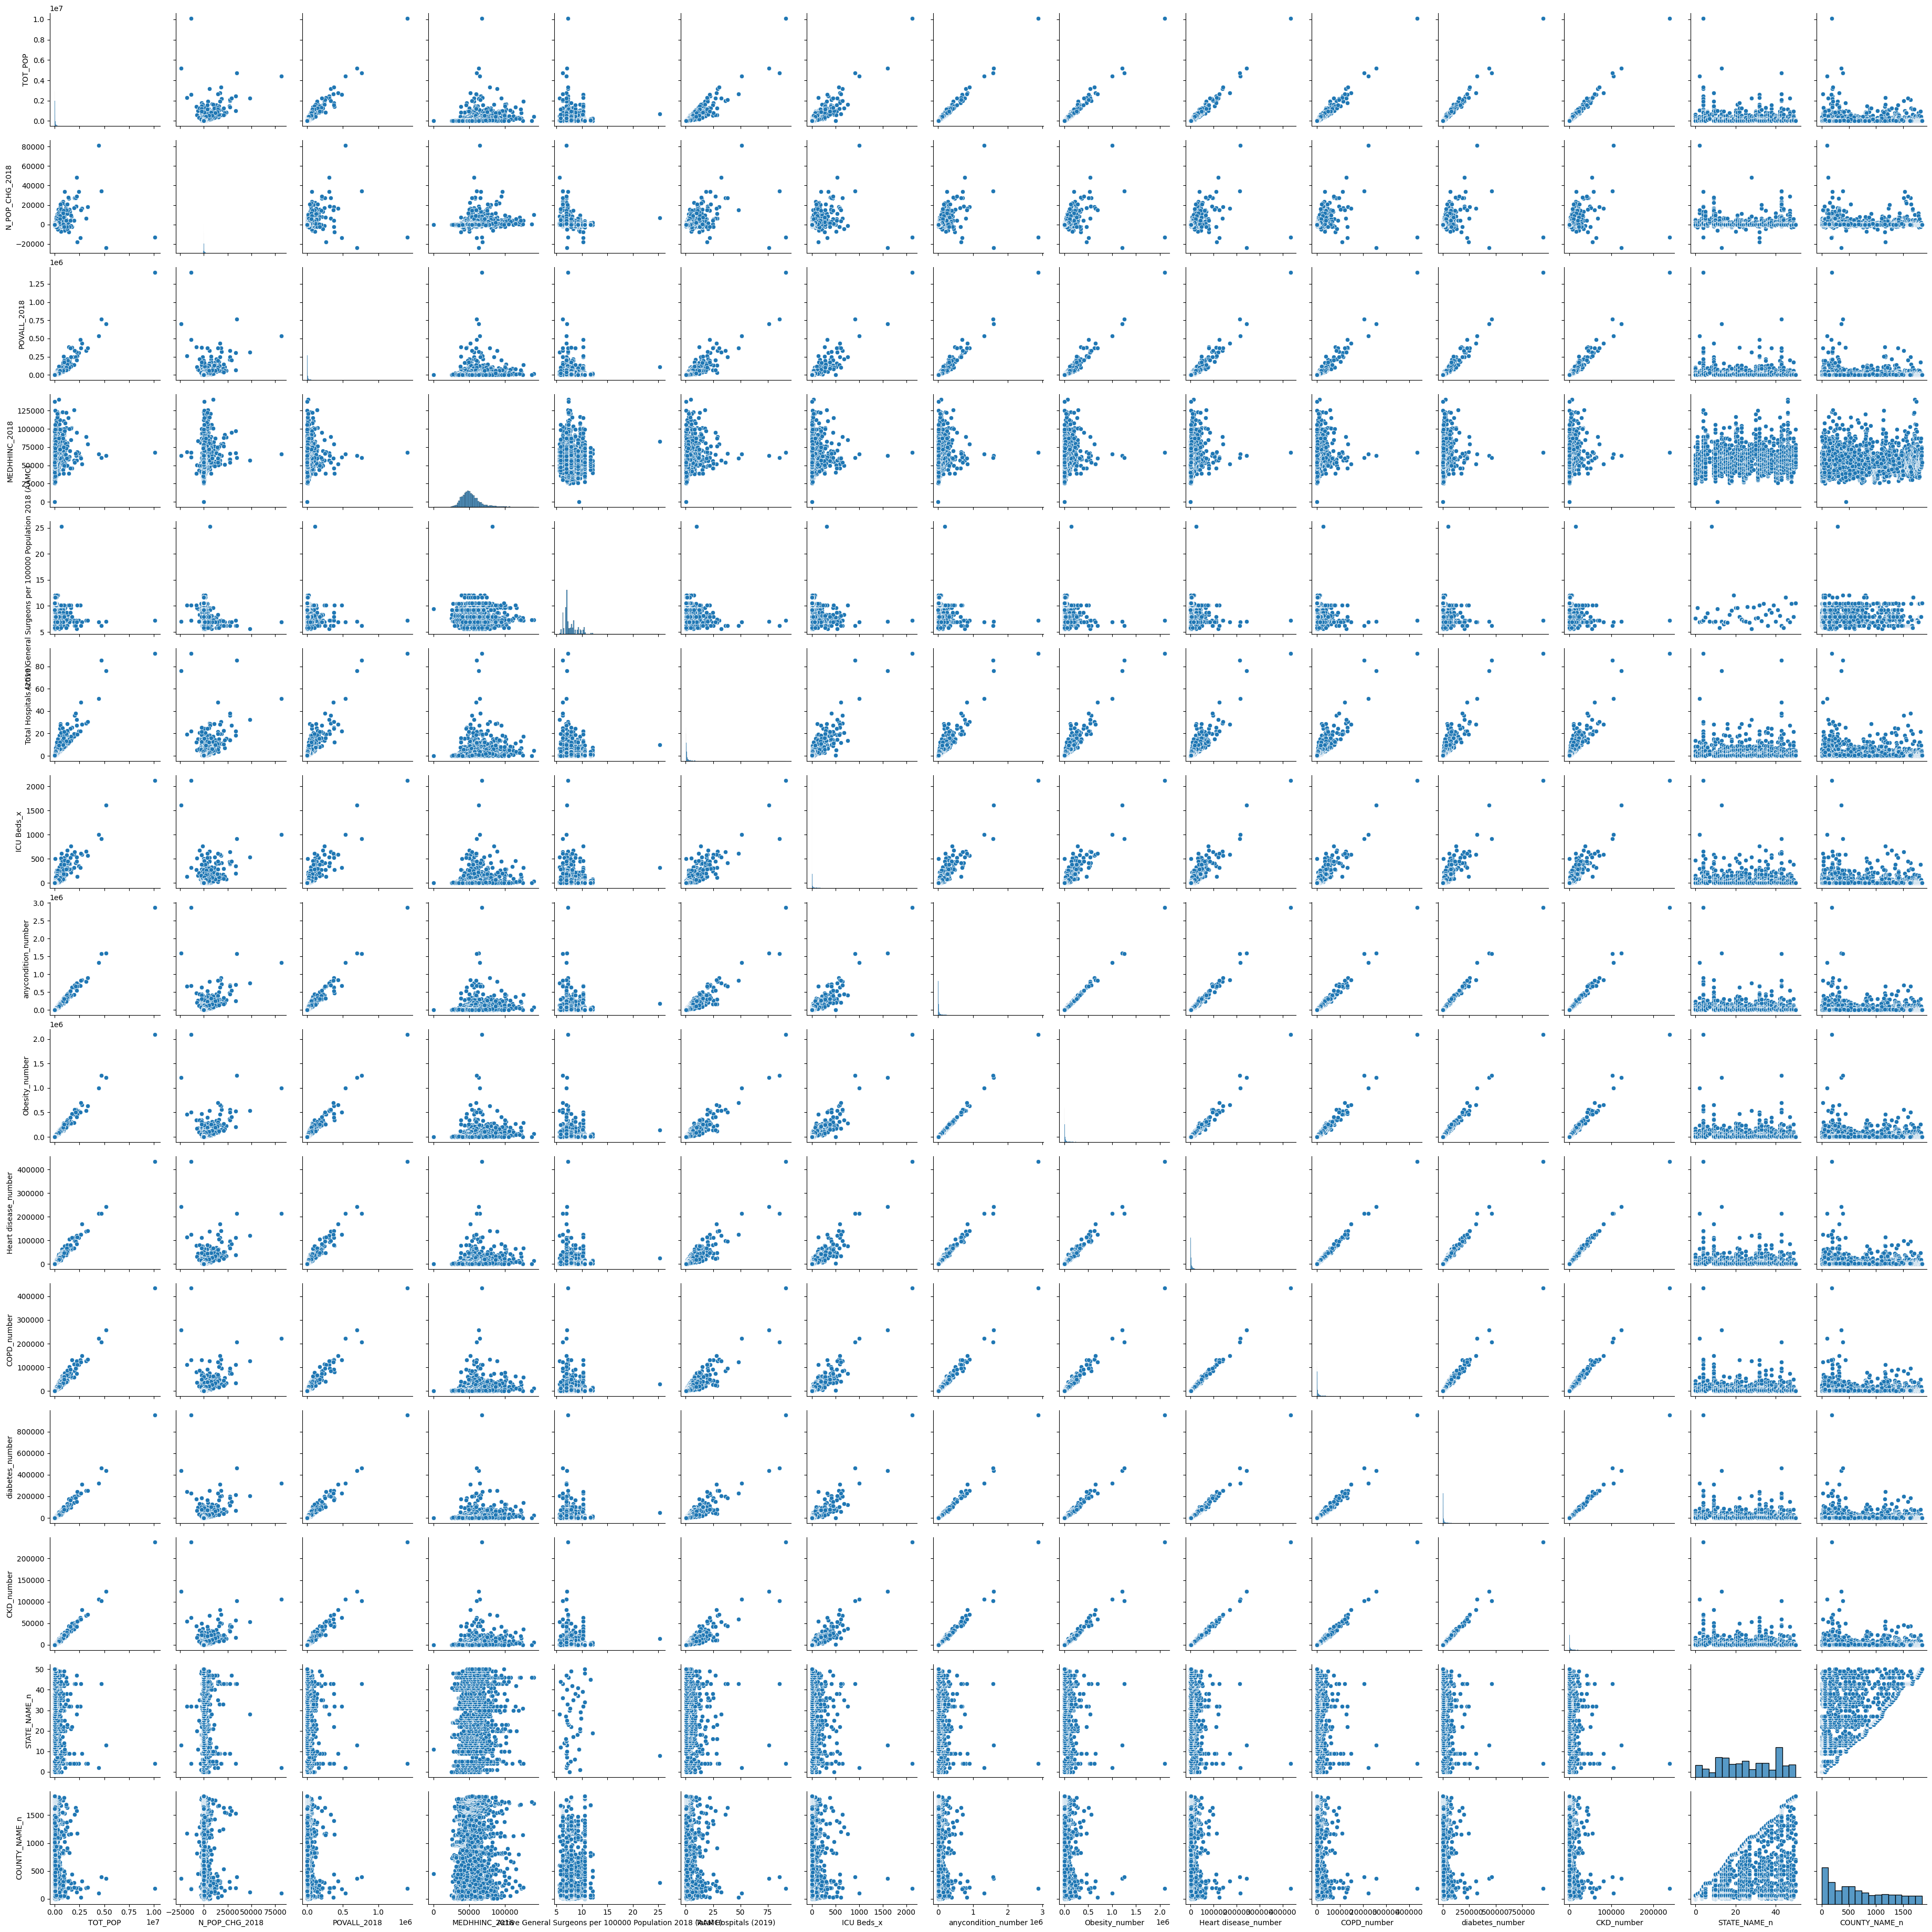

In [14]:
sns.pairplot(data = total_data)

Feature Engineering

Outlier Analysis

In [15]:
total_data.describe()

,TOT_POP,N_POP_CHG_2018,POVALL_2018,MEDHHINC_2018,Active General Surgeons per 100000 Population 2018 (AAMC),Total Hospitals (2019),ICU Beds_x,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,STATE_NAME_n,COUNTY_NAME_n
count,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,643.424522,1.332831e+04,52767.083758,7.621943,1.655299,23.817516,3.338540e+04,2.527613e+04,5597.593312,5827.242357,9326.577707,2466.234076,26.253503,688.478981
std,3.335834e+05,3134.863686,4.560973e+04,13907.992668,1.288832,4.293436,84.602028,9.888669e+04,7.446684e+04,15615.285499,15720.551934,29754.601185,7730.422067,14.260381,541.767733
min,8.800000e+01,-24009.000000,0.000000e+00,0.000000,5.600000,0.001363,0.000000,4.100000e+01,2.500000e+01,7.000000,7.000000,11.000000,3.000000,0.000000,0.000000
25%,1.096325e+04,-78.000000,1.597000e+03,43677.000000,6.900000,0.248797,0.000000,4.215000e+03,3.075000e+03,798.500000,815.000000,1187.750000,314.750000,14.000000,182.000000
50%,2.580050e+04,20.000000,3.769500e+03,50564.500000,7.100000,0.524404,0.000000,9.753000e+03,7.182500e+03,1814.500000,1963.500000,2743.000000,718.000000,25.000000,564.000000
75%,6.791300e+04,300.500000,9.397250e+03,58822.250000,8.300000,1.311585,12.000000,2.500125e+04,1.854250e+04,4376.000000,4727.000000,6679.250000,1776.250000,40.000000,1129.250000
max,1.010552e+07,81244.000000,1.409155e+06,140382.000000,25.300000,91.712638,2126.000000,2.877316e+06,2.097906e+06,434790.000000,434075.000000,952335.000000,237766.000000,50.000000,1840.000000


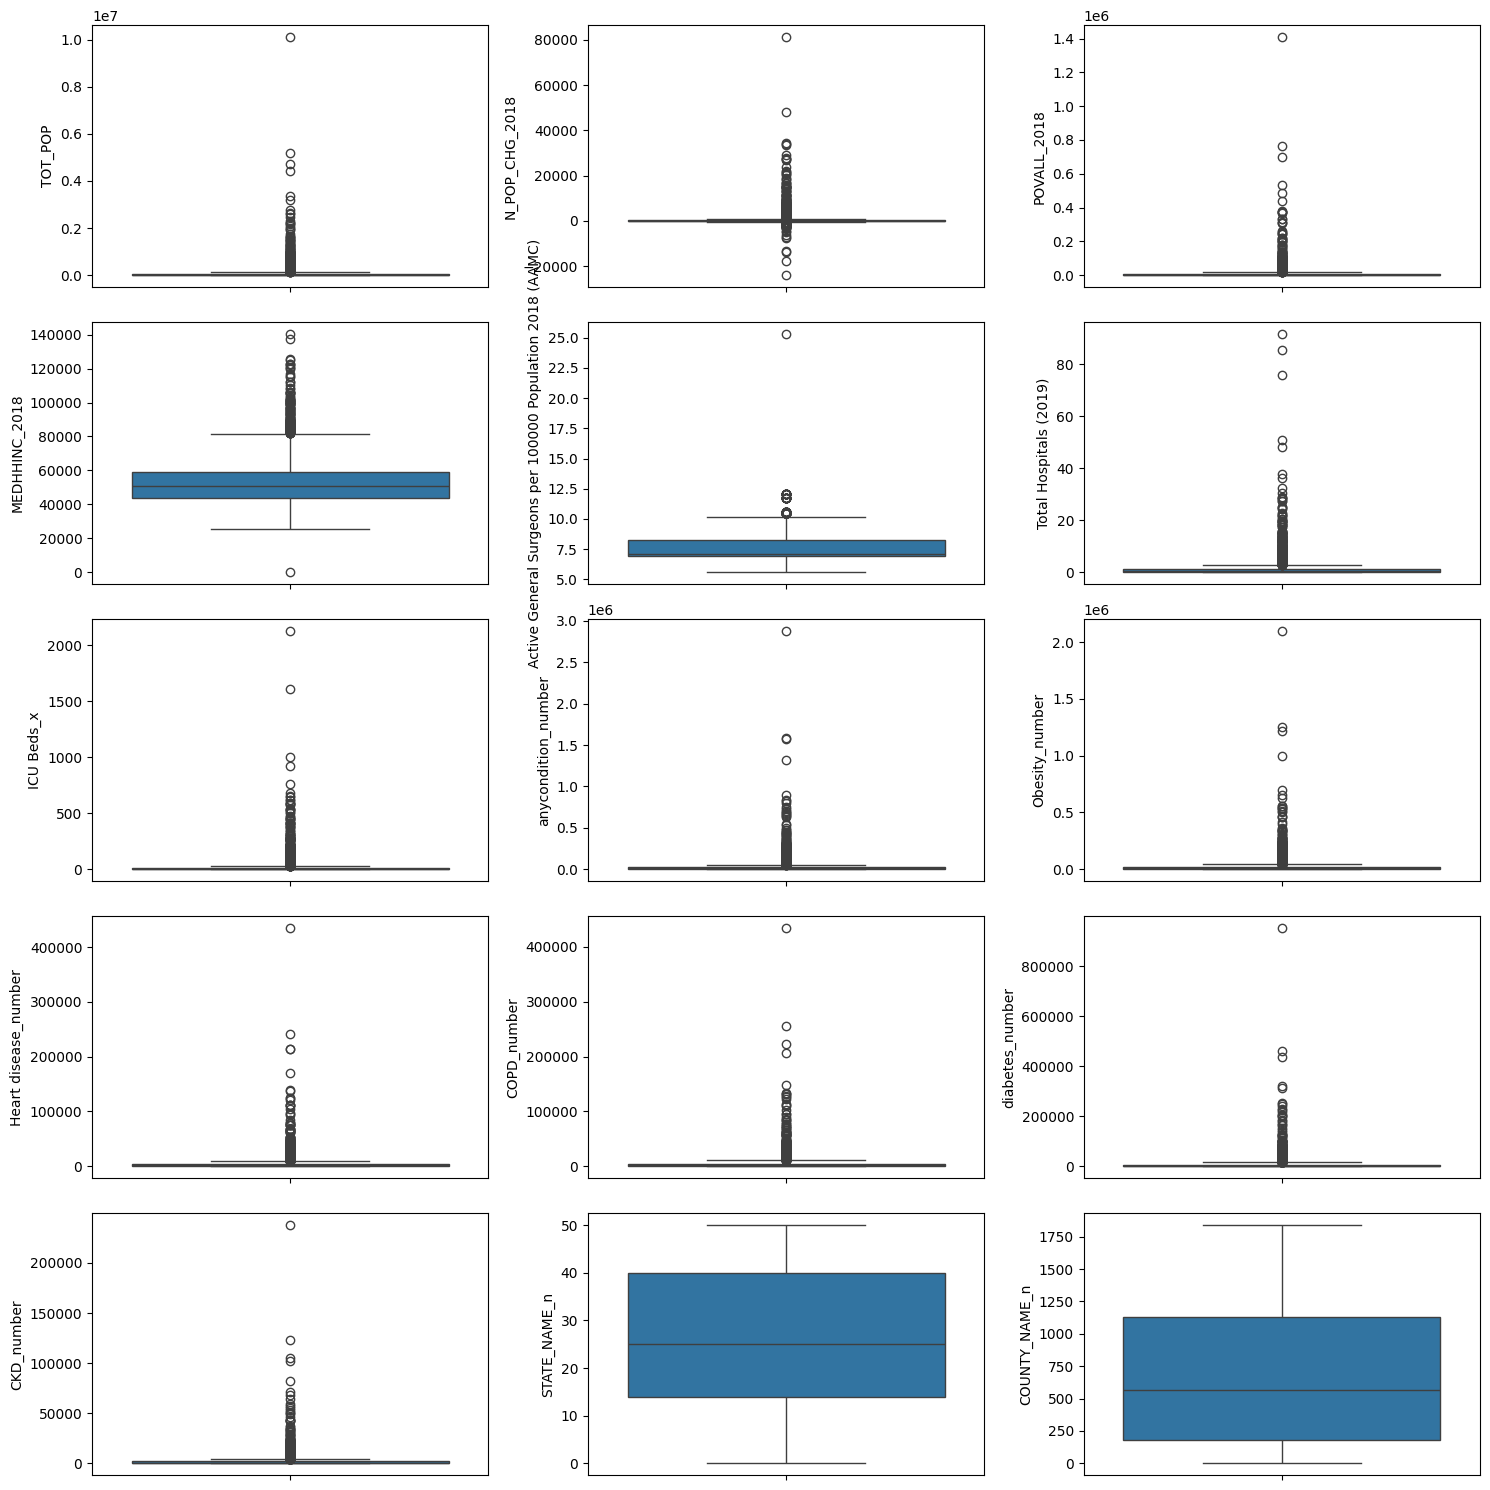

In [16]:
fig, axes = plt.subplots(5, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "TOT_POP")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "N_POP_CHG_2018")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "POVALL_2018")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "MEDHHINC_2018")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "Active General Surgeons per 100000 Population 2018 (AAMC)")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "Total Hospitals (2019)")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "ICU Beds_x")
sns.boxplot(ax = axes[2, 1], data = total_data, y = "anycondition_number")
sns.boxplot(ax = axes[2, 2], data = total_data, y = "Obesity_number")
sns.boxplot(ax = axes[3, 0], data = total_data, y = "Heart disease_number")
sns.boxplot(ax = axes[3, 1], data = total_data, y = "COPD_number")
sns.boxplot(ax = axes[3, 2], data = total_data, y = "diabetes_number")
sns.boxplot(ax = axes[4, 0], data = total_data, y = "CKD_number")
sns.boxplot(ax = axes[4, 1], data = total_data, y = "STATE_NAME_n")
sns.boxplot(ax = axes[4, 2], data = total_data, y = "COUNTY_NAME_n")
plt.tight_layout()
plt.show()

Outlier dectection for the variable "TOT_POP", "POVALL_2018", "Total Hospitals (2019)", and "anycondition_number"

In [17]:
TOT_POP_statistics = total_data["TOT_POP"].describe()
TOT_POP_statistics

count    3.140000e+03
mean     1.041894e+05
std      3.335834e+05
min      8.800000e+01
25%      1.096325e+04
50%      2.580050e+04
75%      6.791300e+04
max      1.010552e+07
Name: TOT_POP, dtype: float64

In [18]:
TOT_POP_iqr = TOT_POP_statistics["75%"] - TOT_POP_statistics["25%"]
upper_limit = TOT_POP_statistics["75%"] + 1.5 * TOT_POP_iqr
lower_limit = TOT_POP_statistics["25%"] - 1.5 * TOT_POP_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(TOT_POP_iqr, 2)}")

The upper limit for finding outliers is 153337.62 and the lower limit is -74461.38, with an interquartile range of 56949.75


In [19]:
total_data = total_data[(total_data["TOT_POP"] < upper_limit) & (total_data["TOT_POP"] > lower_limit)]
print("New data:", len(total_data))

New data: 2708


In [20]:
POVALL_2018_statistics = total_data["POVALL_2018"].describe()
POVALL_2018_statistics

count     2708.000000
mean      4585.731536
std       4683.483397
min          0.000000
25%       1346.000000
50%       3061.000000
75%       6107.250000
max      36326.000000
Name: POVALL_2018, dtype: float64

In [21]:
POVALL_2018_iqr = POVALL_2018_statistics["75%"] - POVALL_2018_statistics["25%"]
upper_limit = POVALL_2018_statistics["75%"] + 1.5 * POVALL_2018_iqr
lower_limit = POVALL_2018_statistics["25%"] - 1.5 * POVALL_2018_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(POVALL_2018_iqr, 2)}")

The upper limit for finding outliers is 13249.12 and the lower limit is -5795.88, with an interquartile range of 4761.25


In [22]:
total_data = total_data[(total_data["POVALL_2018"] < upper_limit) & (total_data["POVALL_2018"] > lower_limit)]
print("New data:", len(total_data))

New data: 2544


In [24]:
Total_Hospitals_statistics = total_data["Total Hospitals (2019)"].describe()
Total_Hospitals_statistics

count    2544.000000
mean        0.577850
std         0.584229
min         0.001363
25%         0.207418
50%         0.397278
75%         0.748599
max         5.897606
Name: Total Hospitals (2019), dtype: float64

In [25]:
Total_Hospitals_iqr = POVALL_2018_statistics["75%"] - Total_Hospitals_statistics["25%"]
upper_limit = Total_Hospitals_statistics["75%"] + 1.5 * Total_Hospitals_iqr
lower_limit = Total_Hospitals_statistics["25%"] - 1.5 * Total_Hospitals_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(Total_Hospitals_iqr, 2)}")

The upper limit for finding outliers is 9161.31 and the lower limit is -9160.36, with an interquartile range of 6107.04


In [26]:
total_data = total_data[(total_data["Total Hospitals (2019)"] < upper_limit) & (total_data["Total Hospitals (2019)"] > lower_limit)]
print("New data:", len(total_data))

New data: 2544


In [27]:
anycondition_number_statistics = total_data["anycondition_number"].describe()
anycondition_number_statistics

count     2544.000000
mean      9937.990566
std       8834.959328
min         41.000000
25%       3418.750000
50%       7117.500000
75%      13873.250000
max      59485.000000
Name: anycondition_number, dtype: float64

In [28]:
anycondition_number_iqr = anycondition_number_statistics["75%"] - anycondition_number_statistics["25%"]
upper_limit = anycondition_number_statistics["75%"] + 1.5 * anycondition_number_iqr
lower_limit = anycondition_number_statistics["25%"] - 1.5 * anycondition_number_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(anycondition_number_iqr, 2)}")

The upper limit for finding outliers is 29555.0 and the lower limit is -12263.0, with an interquartile range of 10454.5


In [29]:
total_data = total_data[(total_data["anycondition_number"] < upper_limit) & (total_data["anycondition_number"] > lower_limit)]
print("New data:", len(total_data))

New data: 2434


We can se that the size of the data frame change now that we deleted the outlier data.

Missing Values Analysis

In [30]:
total_data.isnull().sum().sort_values(ascending = False)

TOT_POP                                                      0
N_POP_CHG_2018                                               0
POVALL_2018                                                  0
MEDHHINC_2018                                                0
Active General Surgeons per 100000 Population 2018 (AAMC)    0
Total Hospitals (2019)                                       0
ICU Beds_x                                                   0
COUNTY_NAME                                                  0
STATE_NAME                                                   0
anycondition_number                                          0
Obesity_number                                               0
Heart disease_number                                         0
COPD_number                                                  0
diabetes_number                                              0
CKD_number                                                   0
STATE_NAME_n                                           

Feature Scaling

In [31]:
from sklearn.model_selection import train_test_split

num_variables = ["TOT_POP", "COUNTY_NAME_n", "Active General Surgeons per 100000 Population 2018 (AAMC)", "ICU Beds_x", "STATE_NAME_n", "anycondition_number"]


X = total_data[num_variables]
y = total_data["Total Hospitals (2019)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,TOT_POP,COUNTY_NAME_n,Active General Surgeons per 100000 Population 2018 (AAMC),ICU Beds_x,STATE_NAME_n,anycondition_number
3025,6997,736,10.5,0,48,3430
1432,68461,398,7.1,14,24,27496
1978,44582,1246,7.1,20,33,18538
462,70422,35,7.0,0,10,20697
1204,19383,285,9.6,6,20,7172


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,TOT_POP,COUNTY_NAME_n,Active General Surgeons per 100000 Population 2018 (AAMC),ICU Beds_x,STATE_NAME_n,anycondition_number
3025,-0.859709,0.077139,2.317324,-0.260723,1.504134,-0.769554
1432,2.284906,-0.546457,-0.381044,0.805082,-0.189158,2.714894
1978,1.063211,1.018066,-0.381044,1.261856,0.445826,1.417890
462,2.385234,-1.216176,-0.460408,-0.260723,-1.176912,1.730486
1204,-0.226018,-0.754937,1.603050,0.196051,-0.471374,-0.227760


In [33]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 10)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=6. All the features will be returned.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,TOT_POP,COUNTY_NAME_n,Active General Surgeons per 100000 Population 2018 (AAMC),ICU Beds_x,STATE_NAME_n,anycondition_number
0,6997.0,736.0,10.5,0.0,48.0,3430.0
1,68461.0,398.0,7.1,14.0,24.0,27496.0
2,44582.0,1246.0,7.1,20.0,33.0,18538.0
3,70422.0,35.0,7.0,0.0,10.0,20697.0
4,19383.0,285.0,9.6,6.0,20.0,7172.0


In [34]:
X_train_sel["Total Hospitals (2019)"] = list(y_train)
X_test_sel["Total Hospitals (2019)"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

Linear Regresion Model

/tmp/ipykernel_564/2926683804.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


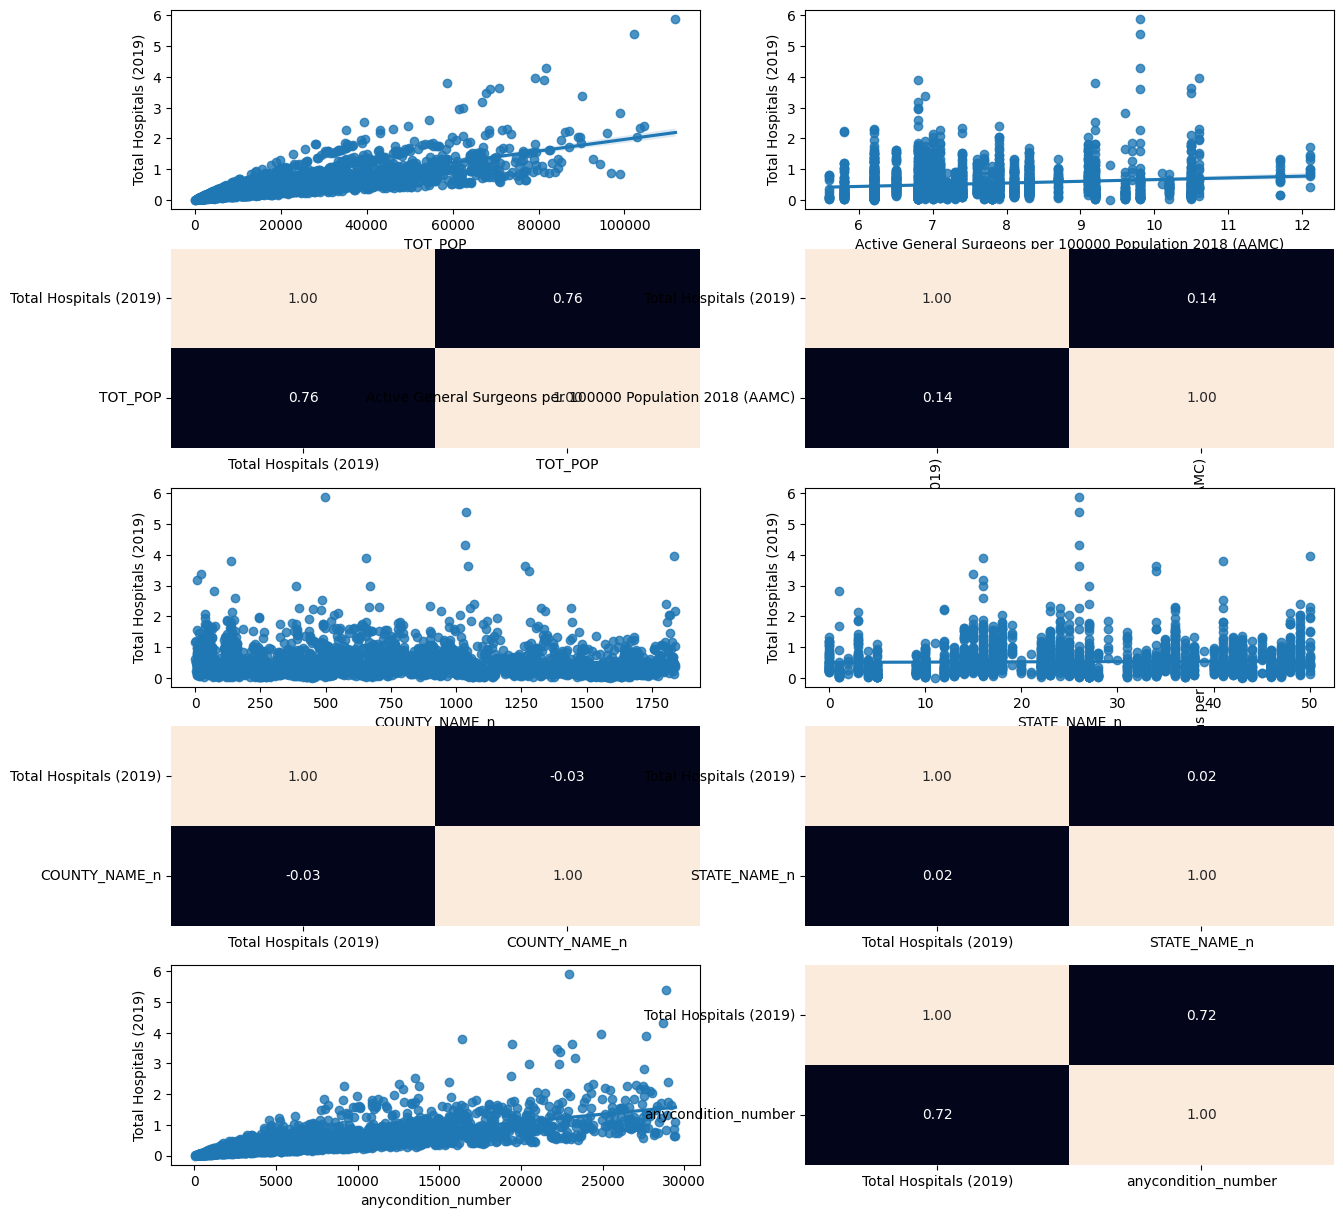

In [35]:
fig, axis = plt.subplots(5, 2, figsize = (15, 15))
total_data = pd.concat([X_train_sel, X_test_sel])

sns.regplot(ax = axis[0, 0], data = total_data, x = "TOT_POP", y = "Total Hospitals (2019)")
sns.heatmap(total_data[["Total Hospitals (2019)", "TOT_POP"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Active General Surgeons per 100000 Population 2018 (AAMC)", y = "Total Hospitals (2019)")
sns.heatmap(total_data[["Total Hospitals (2019)", "Active General Surgeons per 100000 Population 2018 (AAMC)"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[2, 0], data = total_data, x = "COUNTY_NAME_n", y = "Total Hospitals (2019)")
sns.heatmap(total_data[["Total Hospitals (2019)", "COUNTY_NAME_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = total_data, x = "STATE_NAME_n", y = "Total Hospitals (2019)")
sns.heatmap(total_data[["Total Hospitals (2019)", "STATE_NAME_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)
sns.regplot(ax = axis[4, 0], data = total_data, x = "anycondition_number", y = "Total Hospitals (2019)")
sns.heatmap(total_data[["Total Hospitals (2019)", "anycondition_number"]].corr(), annot = True, fmt = ".2f", ax = axis[4, 1], cbar = False)

plt.tight_layout()

plt.show()

Start Training Model

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sel, y_train)

LinearRegression()

Defining parameters

In [37]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coeficients (b1, b2, b3, b4, b5, b6): {model.coef_}")

Intercept (a): -4.107825191113079e-15
Coeficients (b1, b2, b3, b4, b5, b6): [ 1.05272960e-20  5.08219768e-19  1.13900392e-15 -2.05652575e-16
 -2.16304473e-16  7.45388994e-20  1.00000000e+00]


In [38]:
pred = model.predict(X_test_sel)
pred

array([0.07423594, 0.96805268, 0.35693734, 0.41286878, 0.22389156,
       1.36313829, 0.29135908, 1.15034202, 0.2313913 , 2.09489255,
       0.61266936, 0.1466652 , 0.48452146, 0.33783856, 0.24851462,
       0.87010732, 0.22466549, 0.90558455, 0.43868104, 0.31168286,
       0.41673671, 1.81805966, 0.22912163, 0.07791652, 0.71829276,
       0.33577608, 0.57427435, 0.0875557 , 0.01322904, 0.07237956,
       1.21891255, 0.19467486, 0.46877511, 0.24064302, 0.9709425 ,
       0.34289585, 0.38665079, 0.3208962 , 0.34084333, 0.12225936,
       0.48691878, 0.41589494, 0.49670609, 1.6668425 , 0.19918652,
       0.22029764, 0.77556386, 0.35053992, 0.89057826, 0.74389192,
       0.78634613, 0.25677049, 1.14873862, 0.46207066, 0.71484866,
       0.02371677, 0.57909293, 2.0700455 , 0.25384226, 0.36675122,
       0.33362934, 0.6484463 , 0.28928798, 0.35203974, 0.23236386,
       0.12660524, 0.32364823, 0.86104522, 0.7016198 , 0.36093791,
       0.26286543, 0.24997755, 0.67238379, 1.59550282, 1.04605

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, pred)}")
print(f"Coefficient of determination: {r2_score(y_test, pred)}")

Mean squared error: 1.0203943802741904e-29
Coefficient of determination: 1.0


We can see that the coefficient of determination is 1, meaning that is adjusted exactly to the model.

In [40]:
import math
math.sqrt(mean_squared_error(y_test, pred))

3.1943612511333003e-15

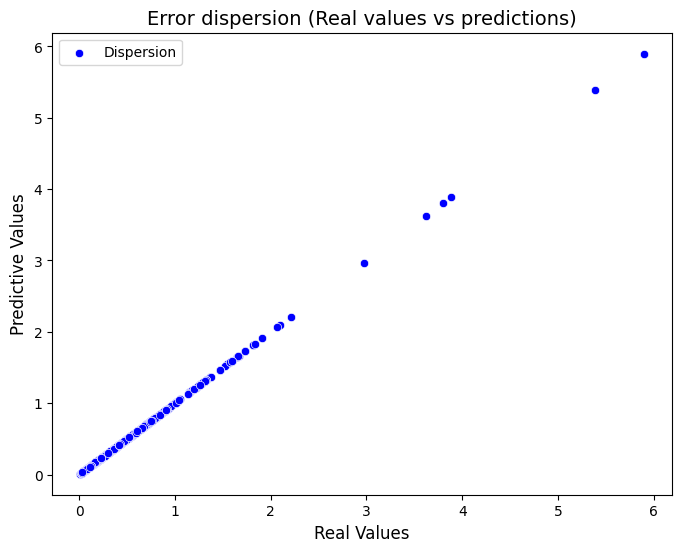

In [41]:
## Error Dispersion
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=pred, color='blue', label='Dispersion')
plt.xlabel('Real Values', fontsize=12)
plt.ylabel('Predictive Values', fontsize=12)
plt.title('Error dispersion (Real values vs predictions)', fontsize=14);

We can see that the pred values and the real values are align, meaning that the linear regression model is pretty good, but there are some values with considerable hyphenation.

Lasso Model (L1)

In [42]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [43]:
lasso_m = {'alpha': np.logspace(-5, 3, 100)}

lasso_grid = GridSearchCV(Lasso(),
        lasso_m,
        n_jobs = 50,
        scoring= 'neg_root_mean_squared_error',
        cv= 5
       )

lasso_grid.fit(X_train_sel, y_train)

: 